#Challenge ❗❗

Chapter 2

1. Buat model machine learning dengan
algoritma klasifikasi (supervised learning)
menggunakan data *train.csv*

2. Lakukan prediksi customer yang churn dari
hasil model (poin 1) menggunakan data *test.csv*

### Table Definition 📑

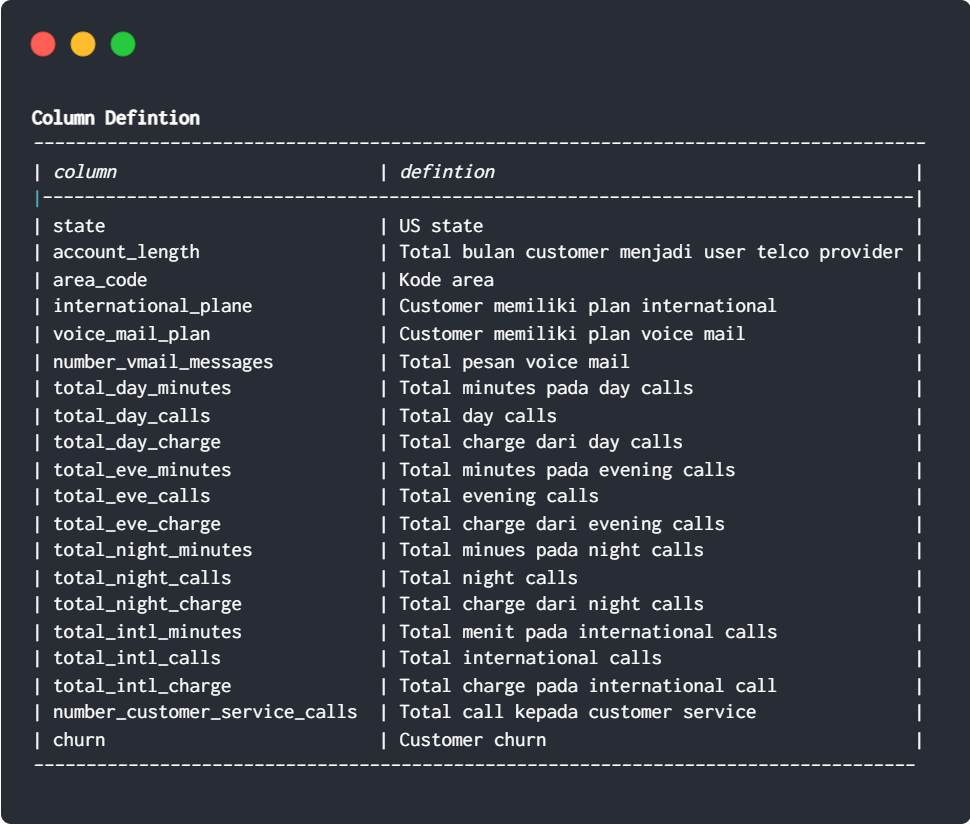

### Import Library

In [ ]:
import numpy as np
import pandas as pd

from google.colab import files
import io

### Upload the dataset

In [ ]:
data = files.upload() #train.csv

Saving train.csv to train.csv


In [ ]:
train = pd.read_csv(io.BytesIO(data['train.csv']))

In [ ]:
data2 = files.upload() #test.csv

Saving test.csv to test.csv


In [ ]:
test = pd.read_csv(io.BytesIO(data2['test.csv']))

### Data Identifications

Dari data tersebut (train.csv) tidak ada data yang null. Berarti kita bisa langsung membuat EDA dan melanjutkan step berikutnya. 

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
train.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [ ]:
#shaping data train
train.shape

(4250, 20)

In [ ]:
#check information data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [ ]:
# check missing value
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### Data Exploration

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Convert Data International Plan

In [ ]:
sex_mapping = {"no" : 0, "yes" : 1}

train['international_plan'] = train['international_plan'].map(sex_mapping)
test['international_plan'] = test['international_plan'].map(sex_mapping)

#### Convert Data Voice Mail Plan

In [ ]:
sex_mapping = {"no" : 0, "yes" : 1}

train['voice_mail_plan'] = train['voice_mail_plan'].map(sex_mapping)
test['voice_mail_plan'] = test['voice_mail_plan'].map(sex_mapping)

### Convert Data Churn

In [ ]:
train = train.replace({'churn': {'yes': 1, 'no': 0}})

In [ ]:
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
train['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

#### Data Visualization

[Text(0.5, 1.0, 'Data Churn')]

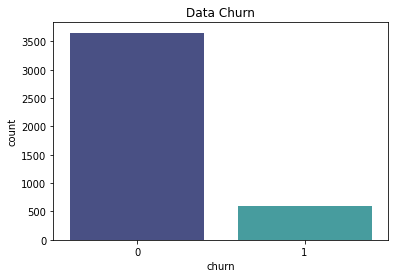

In [ ]:
sns.countplot(data=train, x='churn', palette='mako').set(title="Data Churn")

Data pada table '**churn**' memiliki value yang imbalance antara churn '*yes*' dan '*no*'. Sehingga diperlukan untuk menghandle hal ini.

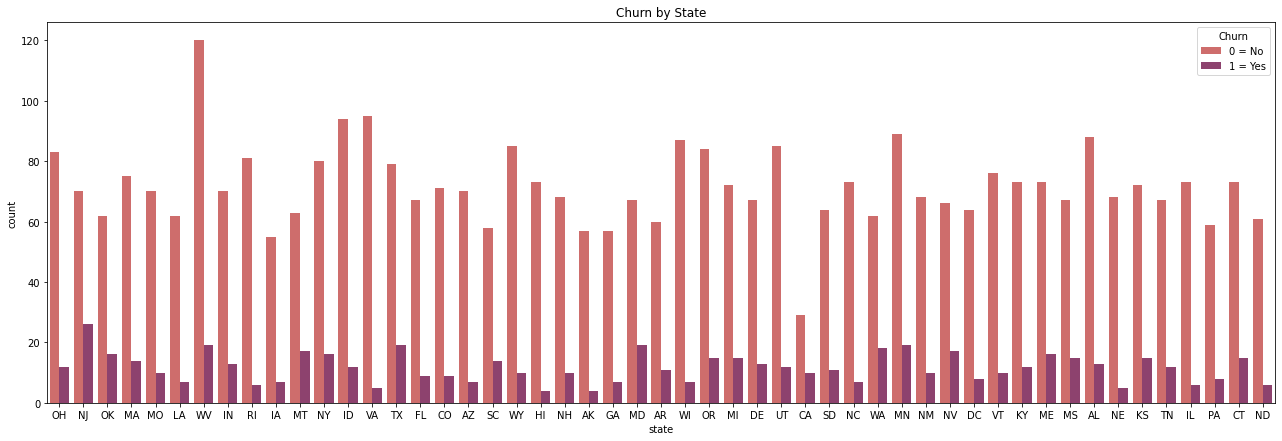

In [ ]:
fig, ax = plt.subplots(figsize = (22, 7))

sns.countplot(data=train, x='state', hue="churn", ax=ax, palette='flare').set(title="Churn by State")
plt.legend(labels=["0 = No","1 = Yes"], title="Churn")

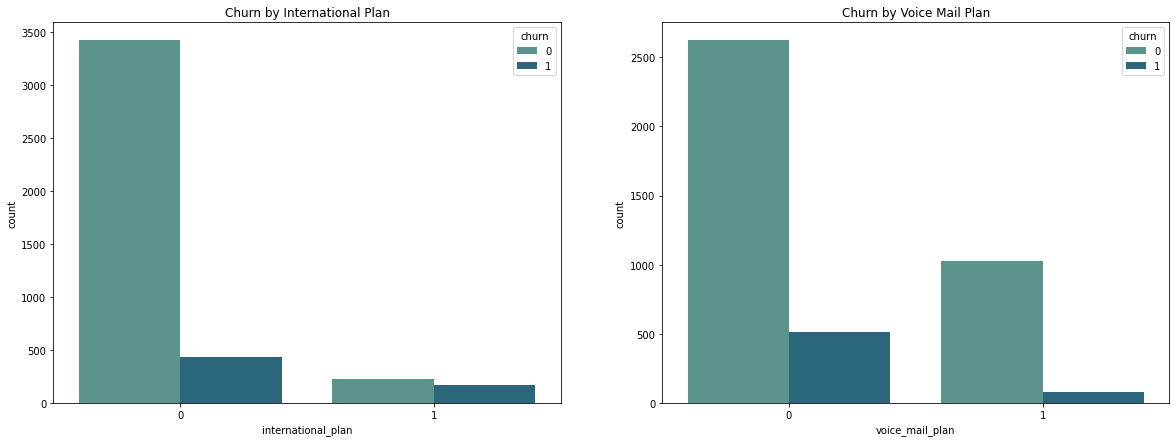

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20,7))

sns.countplot(data=train, x="international_plan", hue="churn", palette="crest", ax=ax[0]).set(title="Churn by International Plan")
sns.countplot(data=train, x="voice_mail_plan", hue="churn", palette="crest", ax=ax[1]).set(title="Churn by Voice Mail Plan")

fig.show()

[Text(0.5, 1.0, 'Number Customer Service')]

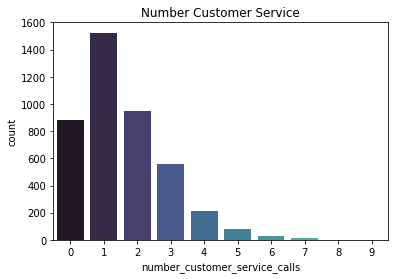

In [ ]:
sns.countplot(data=train, x='number_customer_service_calls', palette='mako').set(title="Number Customer Service")

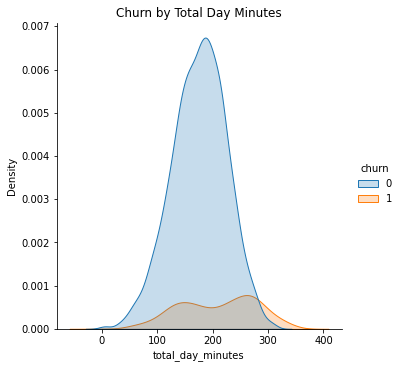

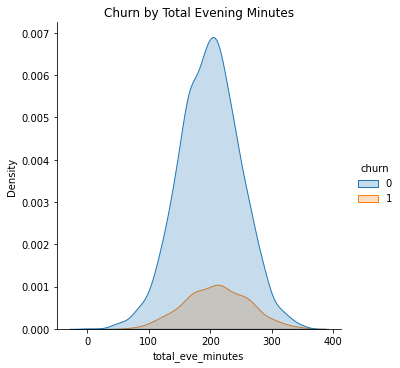

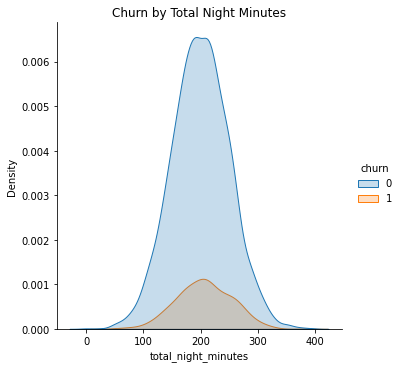

In [ ]:
sns.displot(train, x='total_day_minutes', hue="churn",  kind='kde', fill=True).set(title="Churn by Total Day Minutes")
sns.displot(train, x='total_eve_minutes', hue="churn",  kind='kde', fill=True).set(title="Churn by Total Evening Minutes")
sns.displot(train, x='total_night_minutes', hue="churn",  kind='kde', fill=True).set(title="Churn by Total Night Minutes")

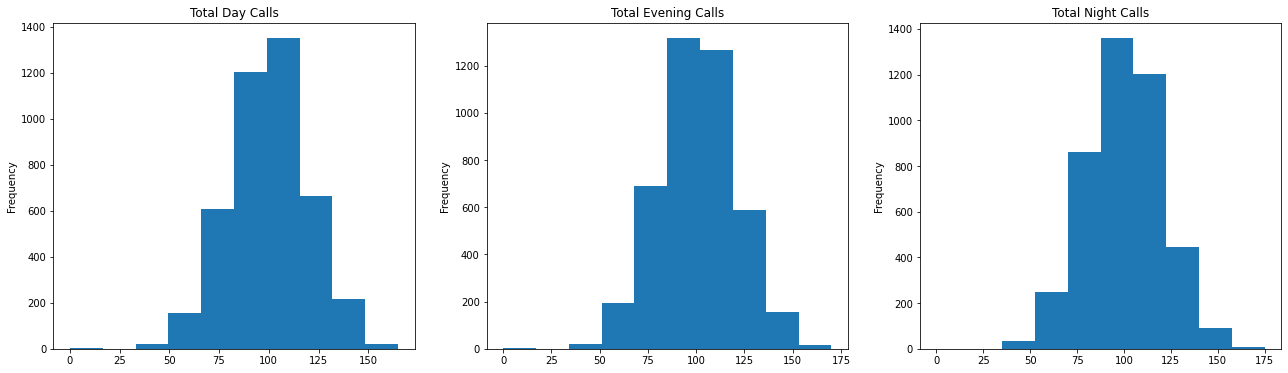

In [ ]:
df1 = train.total_day_calls
df2 = train.total_eve_calls
df3 = train.total_night_calls

fig, axes = plt.subplots(1,3, figsize = (22, 6))

df1.plot(kind="hist", ax=axes[0], title="Total Day Calls")
df2.plot(kind="hist", ax=axes[1], title="Total Evening Calls")
df3.plot(kind="hist", ax=axes[2], title="Total Night Calls")

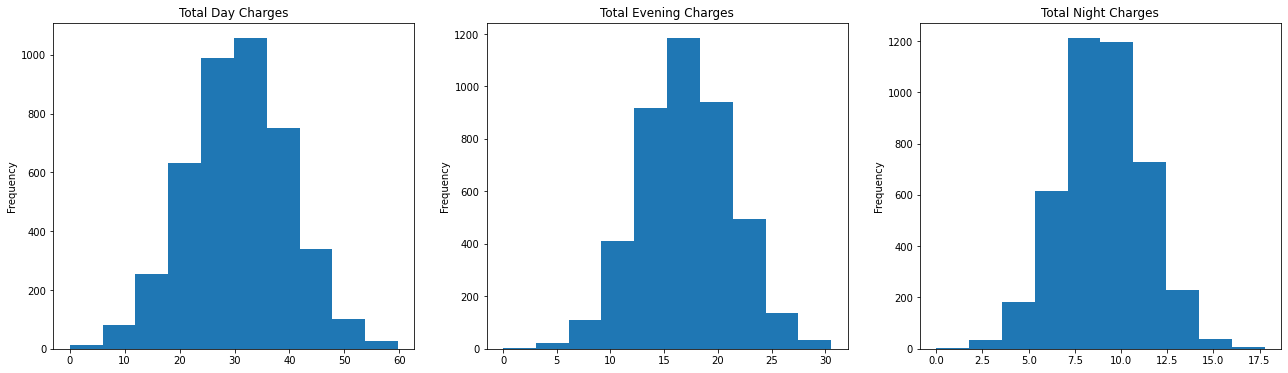

In [ ]:
df1 = train.total_day_charge
df2 = train.total_eve_charge
df3 = train.total_night_charge

fig, axes = plt.subplots(1,3, figsize = (22, 6))

df1.plot(kind="hist", ax=axes[0], title="Total Day Charges")
df2.plot(kind="hist", ax=axes[1], title="Total Evening Charges")
df3.plot(kind="hist", ax=axes[2], title="Total Night Charges")

Correlation Checking

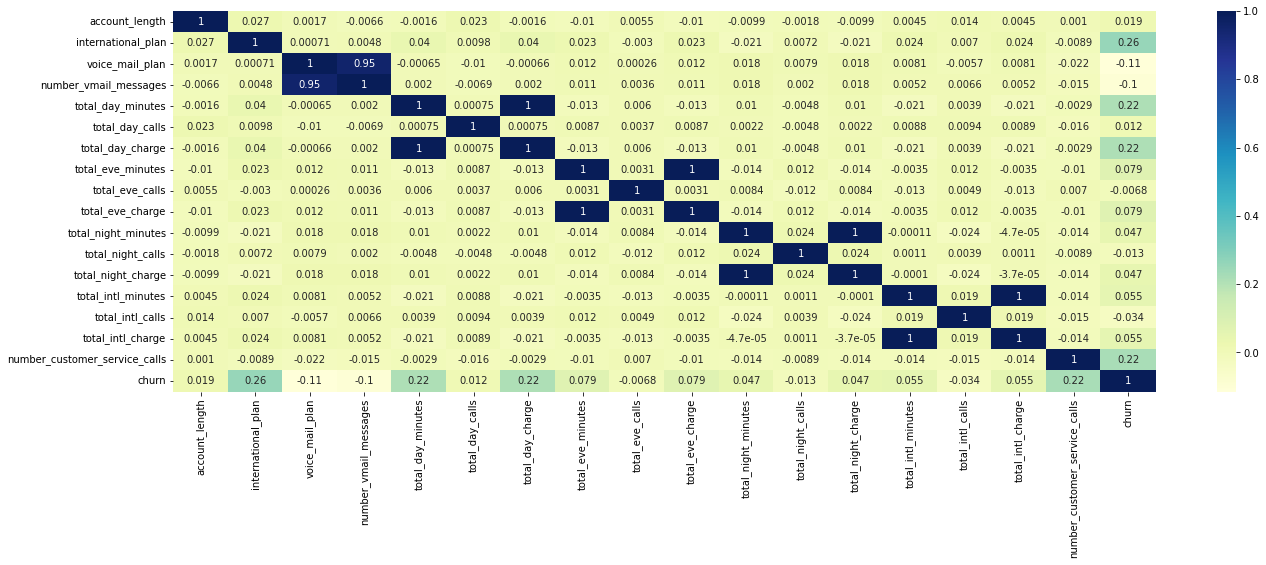

In [ ]:
fig, axes = plt.subplots(figsize = (22, 7))

corr = train.corr() # plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="YlGnBu", ax=axes)

### Drop Columns

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
train[train['churn']==0].head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
train.drop(['state', 'account_length', 'area_code'], axis=1, inplace=True)

train.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


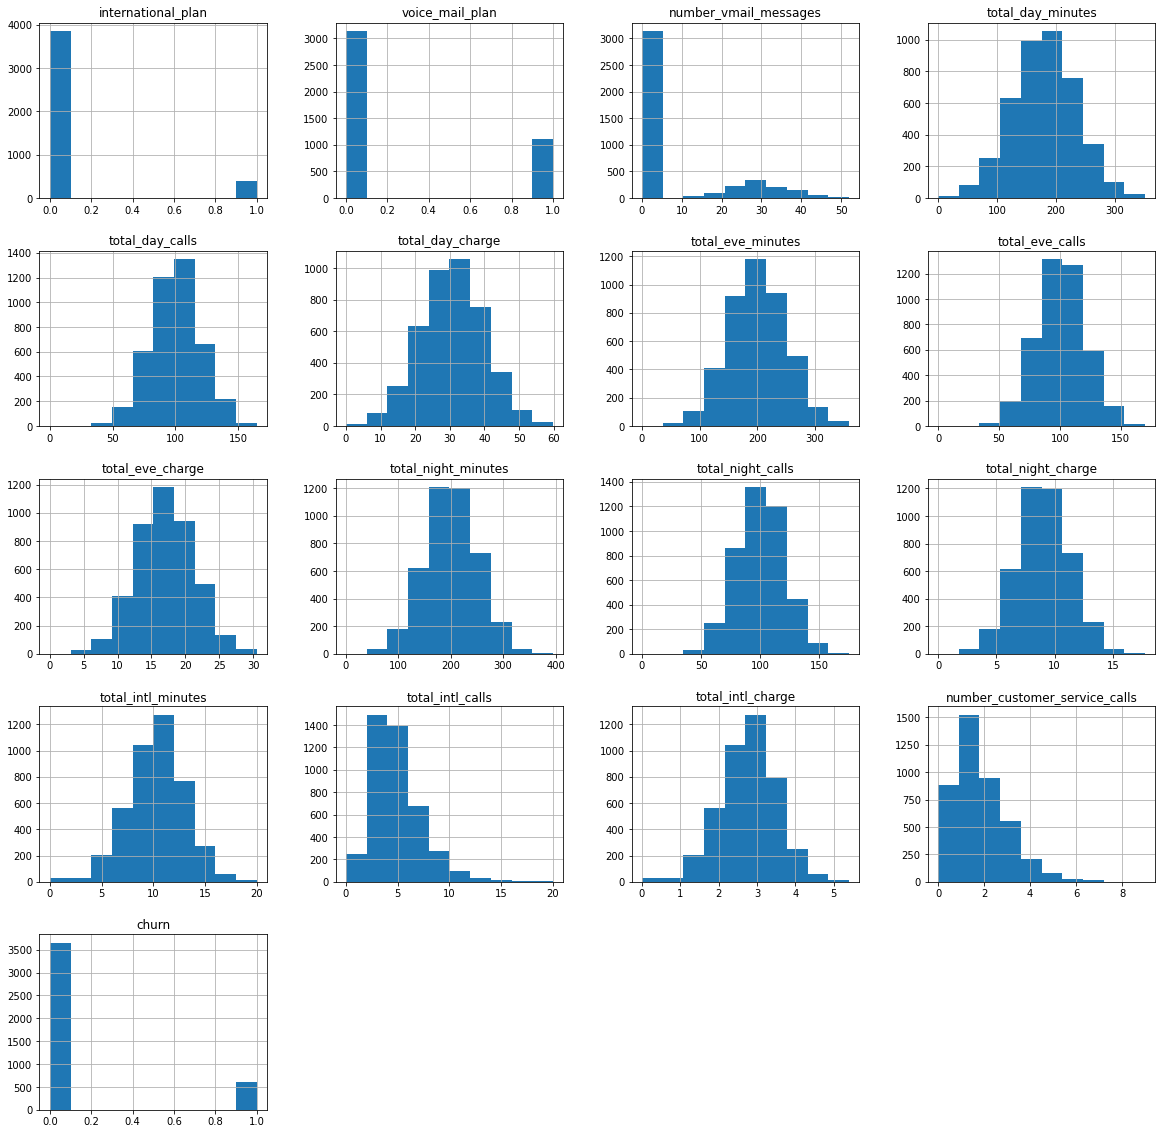

In [ ]:
train.hist(figsize=(20,20))

plt.show()

### MODELING

In [ ]:
train.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
  # Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, matthews_corrcoef, f1_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold

In [ ]:
train_data = train.drop("churn",axis = 1 )
target = train['churn']

In [ ]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

#### Gaussian Naive Bayes

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print("Scores : ", score)
print("Mean   : ", score.mean())
print("Standad Deviation : ", score.std())

Scores :  [0.89176471 0.87294118 0.86352941 0.89058824 0.85882353]
Mean   :  0.8755294117647058
Standad Deviation :  0.013565680287434906


#### Decision Tree

In [ ]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print("Scores : ", score)
print("Mean   : ", score.mean())
print("Standad Deviation : ", score.std())

Scores :  [0.92235294 0.93176471 0.93294118 0.92823529 0.92      ]
Mean   :  0.9270588235294118
Standad Deviation :  0.005101054914983243


#### Random Forest

In [ ]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print("Scores : ", score)
print("Mean   : ", score.mean())
print("Standad Deviation : ", score.std())

Scores :  [0.96470588 0.95764706 0.96       0.96117647 0.95647059]
Mean   :  0.96
Standad Deviation :  0.002881752638568462


### Customer Prediction

In [ ]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
test.drop(['id', 'state', 'account_length', 'area_code'], axis=1, inplace=True)

#### GaussianNB Prediction

In [ ]:
clf = GaussianNB()
clf.fit(train_data, target)

GaussianNB()

In [ ]:
prediction = clf.predict(test)

In [ ]:
df_test = pd.read_csv("test.csv")

submission = pd.DataFrame({
        "state": df_test["state"],
        "area_code" : df_test["area_code"],
        "churn": prediction
    })
submission.head()

,state,area_code,churn
0,KS,area_code_415,0
1,AL,area_code_510,1
2,IA,area_code_415,0
3,VT,area_code_510,0
4,NE,area_code_415,0


In [ ]:
test['churn'] = submission['churn']

test.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1
2,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0
3,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


In [ ]:
submission.to_csv("submitNB.csv", index = False)

#### Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

DecisionTreeClassifier()

In [ ]:
test.drop(['churn'], axis=1, inplace=True)

In [ ]:
dtprediction = clf.predict(test)

In [ ]:
df_test = pd.read_csv("test.csv")

submission = pd.DataFrame({
        "state": df_test["state"],
        "area_code" : df_test["area_code"],
        "churn": dtprediction
    })
submission.head()

,state,area_code,churn
0,KS,area_code_415,0
1,AL,area_code_510,0
2,IA,area_code_415,1
3,VT,area_code_510,0
4,NE,area_code_415,0


In [ ]:
test['churn'] = submission['churn']

test.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


In [ ]:
submission.to_csv("submitDT.csv", index = False)

#### RandomForest Prediction

In [ ]:
clf = RandomForestClassifier()
clf.fit(train_data, target)

RandomForestClassifier()

In [ ]:
test.drop(['churn'], axis=1, inplace=True)

In [ ]:
rfPrediction = clf.predict(test)

In [ ]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "state": df_test["state"],
        "area_code" : df_test["area_code"],
        "churn": dtprediction
    })
submission.head()

,state,area_code,churn
0,KS,area_code_415,0
1,AL,area_code_510,0
2,IA,area_code_415,1
3,VT,area_code_510,0
4,NE,area_code_415,0


In [ ]:
test['churn'] = submission['churn']
test.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


In [ ]:
submission.to_csv("submitRF.csv", index = False)